In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import forward_model as fm 
import baker_hubbard_pf as bh
from Bio.PDB import PDBParser, NeighborSearch



In [38]:
parser = PDBParser(QUIET=True)
nist = parser.get_structure('nist', '/Users/yuliagutierrez/Downloads/fab_h.pdb')
contacts = fm.count_heavy_atom_contacts(nist, 6.0)
hbonds = bh.calculate_hbond_number('/Users/yuliagutierrez/Downloads/fab_h.pdb')    
contact_counts = {residue.id[1]: count for residue, count in contacts.items()}

#create a dataframe from hbonds df where key is res_id and value is the number of hbonds
hbond_df = pd.DataFrame.from_dict(hbonds, orient='index', columns=['hbonds']) 
hbond = hbond_df.reset_index()
hbond
#rename index to res_id
hbond = hbond.rename(columns={'index':'res_id'})
hbond
#create a dataframe from contact_counts where key is res_id and value is the number of contacts
contact_df = pd.DataFrame.from_dict(contact_counts, orient='index', columns=['contacts'])
contact_df.reset_index(inplace=True)
#rename index to res_id
contact_df = contact_df.rename(columns={'index':'res_id'})

#merge the two dataframes on res_id
merged = pd.merge(hbond, contact_df, on='res_id')
#create a new column called protection factors that is 0.35*contacts + 2*hbonds 
merged['ln_protection_factors'] = 0.35*merged['contacts'] + 2*merged['hbonds']
merged

#create a dictionary where key is res_id and value is the protection factor
protection_factors = {row['res_id']: row['ln_protection_factors'] for index, row in merged.iterrows()}
protection_factors

{3.0: 18.099999999999998,
 5.0: 17.049999999999997,
 6.0: 34.8,
 7.0: 17.4,
 11.0: 25.099999999999998,
 13.0: 22.65,
 16.0: 16.7,
 17.0: 20.9,
 19.0: 24.4,
 21.0: 31.749999999999996,
 22.0: 24.65,
 23.0: 33.849999999999994,
 24.0: 23.599999999999998,
 25.0: 23.0,
 26.0: 18.35,
 30.0: 18.099999999999998,
 31.0: 28.599999999999998,
 32.0: 35.599999999999994,
 33.0: 40.15,
 34.0: 46.099999999999994,
 35.0: 47.4,
 36.0: 34.55,
 37.0: 36.45,
 38.0: 27.549999999999997,
 41.0: 17.049999999999997,
 44.0: 27.549999999999997,
 46.0: 31.749999999999996,
 47.0: 36.3,
 48.0: 29.299999999999997,
 50.0: 28.599999999999998,
 51.0: 18.099999999999998,
 52.0: 20.2,
 54.0: 20.9,
 57.0: 23.0,
 60.0: 28.95,
 61.0: 30.349999999999998,
 62.0: 20.2,
 64.0: 19.75,
 66.0: 17.299999999999997,
 69.0: 20.549999999999997,
 70.0: 35.25,
 71.0: 24.049999999999997,
 72.0: 33.15,
 73.0: 26.5,
 74.0: 33.15,
 75.0: 20.549999999999997,
 77.0: 32.8,
 78.0: 24.299999999999997,
 81.0: 32.099999999999994,
 83.0: 26.8499999999

In [39]:
nist = pd.read_csv('/Users/yuliagutierrez/Downloads/nist_fab_lab1a.csv')
nist['0s'] =(nist['0s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['30s'] =(nist['30s_L1Ar1'] - nist['0s_L1A'])*nist['charge(z)']
nist['60s'] =(nist['60s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['300s'] =(nist['300s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['900s'] =(nist['900s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['3600s'] =(nist['3600s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['14400s'] =(nist['14400s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['86400s'] = (nist['full'] - nist['0s_L1A'])*nist['charge(z)']
#drop columns 0s_L1A, 30s_L1Ar1, 60s_L1A, 300s_L1A, 900s_L1A, 3600s_L1A, 14400s_L1A, full
nist = nist.drop(columns=['0s_L1A', '30s_L1Ar1', '60s_L1A', '300s_L1A', '900s_L1A', '3600s_L1A', '14400s_L1A', 'full'])
nist

,Chain,Peptide,charge(z),0s,30s,60s,300s,900s,3600s,14400s,86400s
0,HC,QVTLRESGPA,2,0.0,4.356867,4.331400,4.233200,4.262000,4.286333,4.480133,5.834267
1,HC,RESGPALVKPTQT,2,0.0,2.259933,2.642000,3.375333,3.587667,4.074067,4.523000,6.685200
2,HC,RESGPALVKPTQTLTL,3,0.0,2.715300,3.135800,3.871500,4.107100,4.498900,4.954500,7.675800
3,HC,TCTFSG,1,0.0,0.718800,0.854333,1.030767,1.146433,1.232967,1.481833,2.593867
4,HC,TCTFSGF,1,0.0,0.743033,0.806367,1.196700,1.483833,1.769167,2.052400,2.951133
...,...,...,...,...,...,...,...,...,...,...,...
149,LC,YSLSST,1,0.0,0.066333,0.091733,0.106400,0.177067,0.454133,0.752967,2.287567
150,LC,YSLSSTL,1,0.0,0.118333,0.175367,0.230767,0.291267,0.512600,0.784200,2.188167
151,LC,LTLSKADYEKHKVYACE,4,0.0,1.560533,1.825200,2.068533,2.202267,2.680400,3.434667,7.721333
152,LC,TLSKADYEKHKVYACE,4,0.0,1.525733,1.789867,2.015600,2.151467,2.626267,3.341733,7.210800


In [40]:
peptide_list = nist['Peptide'].tolist()

# Create a dictionary to store the results for each time point
all_results_hdxer = {}

# Time points
time_points = [0, 30, 60, 300, 900, 3600, 14400, 86400]

for timepoint in time_points:
    # Create an empty dictionary for each time point
    hdxer_results = {}
    for peptide in peptide_list: 
        try:
            # Calculate the percentage of deuterium per peptide for the given time point
            result = fm.calc_percentage_deuterium_per_peptide_hdxer(peptide, protection_factors, 0.85, timepoint, 7, 298, '/Users/yuliagutierrez/Downloads/fab_h.pdb')
            hdxer_results[peptide] = result
        except ValueError as e:
            print(f"Error processing peptide {peptide} at timepoint {timepoint}: {e}")
            hdxer_results[peptide] = None
    # Store the results for the current time point in the all_results dictionary
    all_results_hdxer[timepoint] = hdxer_results

Error processing peptide TCTFSG at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide TCTFSGF at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide SVGWIRQPPGKALEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide LEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide EWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLADI at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide ADIWWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide YYCARD at timepoint 0: Peptide sequence not found in the full sequence

In [41]:
hdxer_df = pd.DataFrame(all_results_hdxer)
# hdxer_df.to_csv('/Users/yuliagutierrez/Downloads/forward_model_results_hdxer.csv')
#rename columns to match nist data
hdxer_df.columns = ['0s_HDXER', '30s_HDXER', '60s_HDXER', '300s_HDXER', '900s_HDXER', '3600s_HDXER', '14400s_HDXER', '86400s_HDXER']
hdxer_df.reset_index(inplace=True)
hdxer_df.rename(columns = {'index':'Peptide'}, inplace = True)
hdxer_df

all_merged = pd.merge(nist, hdxer_df, on='Peptide')
#drop the peptide MTQSPSTL from all_merged
all_merged = all_merged[all_merged.Peptide != 'MTQSPSTL']
all_merged

#


,Chain,Peptide,charge(z),0s,30s,60s,300s,900s,3600s,14400s,86400s,0s_HDXER,30s_HDXER,60s_HDXER,300s_HDXER,900s_HDXER,3600s_HDXER,14400s_HDXER,86400s_HDXER
0,HC,QVTLRESGPA,2,0.0,4.356867,4.331400,4.233200,4.262000,4.286333,4.480133,5.834267,0.0,2.164769e-03,4.324025e-03,2.140133e-02,6.260140e-02,2.240820e-01,6.001470e-01,0.850187
1,HC,RESGPALVKPTQT,2,0.0,2.259933,2.642000,3.375333,3.587667,4.074067,4.523000,6.685200,0.0,2.165435e-03,4.325359e-03,2.140800e-02,6.262141e-02,2.241621e-01,6.004670e-01,0.852106
2,HC,RESGPALVKPTQTLTL,3,0.0,2.715300,3.135800,3.871500,4.107100,4.498900,4.954500,7.675800,0.0,2.167691e-03,4.329870e-03,2.143055e-02,6.268907e-02,2.244327e-01,6.015493e-01,0.858589
3,HC,TCTFSG,1,0.0,0.718800,0.854333,1.030767,1.146433,1.232967,1.481833,2.593867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HC,TCTFSGF,1,0.0,0.743033,0.806367,1.196700,1.483833,1.769167,2.052400,2.951133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,LC,YSLSST,1,0.0,0.066333,0.091733,0.106400,0.177067,0.454133,0.752967,2.287567,0.0,1.055442e-09,2.110883e-09,1.055442e-08,3.166325e-08,1.266530e-07,5.066119e-07,0.000003
150,LC,YSLSSTL,1,0.0,0.118333,0.175367,0.230767,0.291267,0.512600,0.784200,2.188167,0.0,1.166827e-09,2.333654e-09,1.166827e-08,3.500481e-08,1.400192e-07,5.600768e-07,0.000003
151,LC,LTLSKADYEKHKVYACE,4,0.0,1.560533,1.825200,2.068533,2.202267,2.680400,3.434667,7.721333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,LC,TLSKADYEKHKVYACE,4,0.0,1.525733,1.789867,2.015600,2.151467,2.626267,3.341733,7.210800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/anaconda3/envs/imp/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


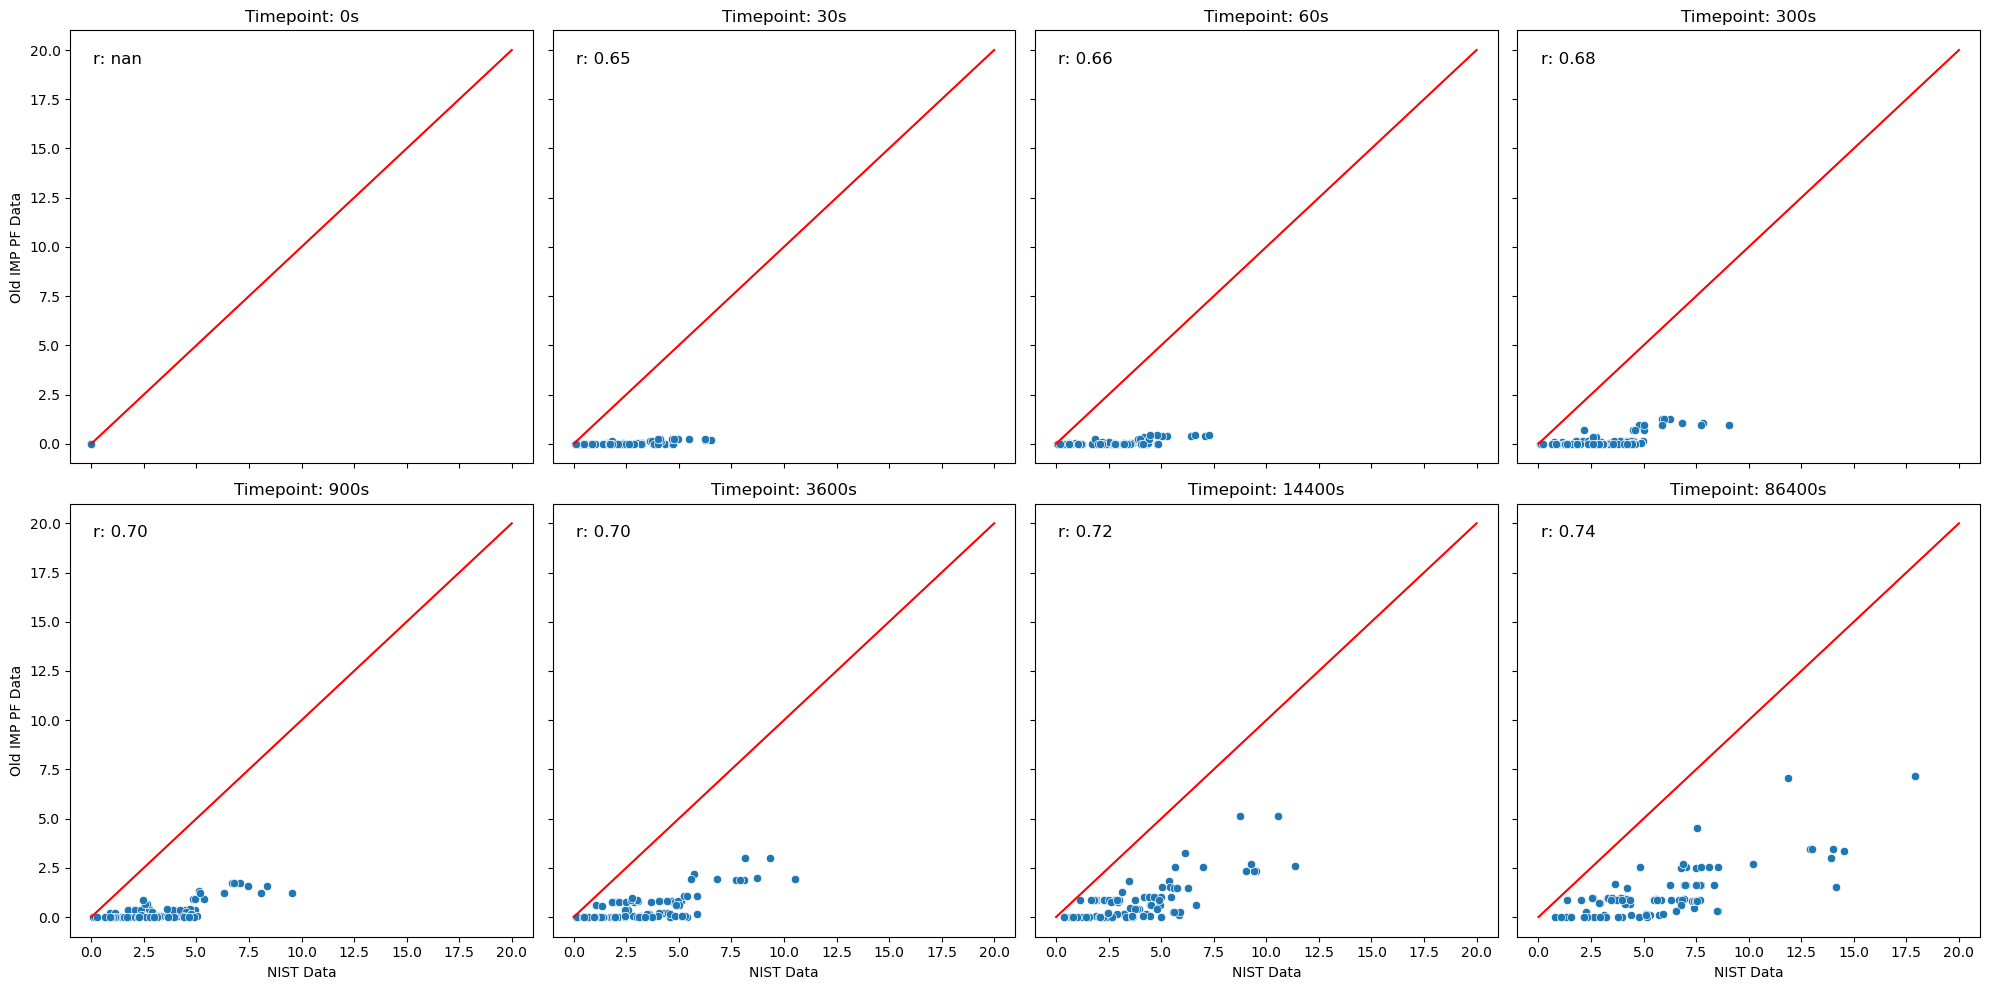

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for each time point using subplots with shared axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, timepoint in enumerate(time_points):
    ax = axes[i]
    # Create scatter plot
    sns.scatterplot(data=all_merged, x=f'{timepoint}s', y=f'{timepoint}s_HDXER', ax=ax)
    
    # Calculate correlation coefficient
    correlation = all_merged[f'{timepoint}s'].corr(all_merged[f'{timepoint}s_HDXER'])
    
    # Add correlation text on the plot
    ax.text(0.05, 0.95, f'r: {correlation:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    #plot x = y line
    
    ax.plot([0, 20], [0, 20], color='red', linestyle='-')    
    # Set axes labels
    ax.set_xlabel("NIST Data")
    ax.set_ylabel("Old IMP PF Data")
    ax.set_title(f"Timepoint: {timepoint}s")

plt.tight_layout()
plt.savefig('/Users/yuliagutierrez/Downloads/old_imp_vs_nist.png', dpi = 600)

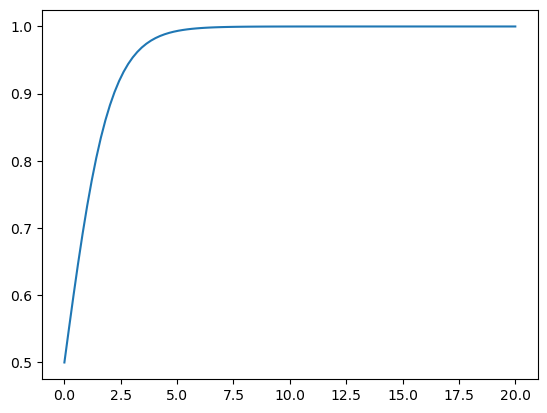

In [ ]:
def rational_6_12(x, k, d0=0, n=6, m=12):
    num = 1 - ( (x-d0) / k ) ** n
    denom = 1 - ( (x-d0) / k ) ** m
    return num/denom

# Define the range of x values
x_values = np.linspace(0, 20, 100)

# Define the parameter k
k = 1

# Calculate the y values using the rational_6_12 function
y_values = rational_6_12(x_values, k)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'rational_6_12(x, k={k})')

# Add labels and title
plt.xlabel('x')
plt.ylabel('rational_6_12(x, k)')
plt.title('Plot of rational_6_12 Function')
plt.legend()

# Show the plot
plt.show()

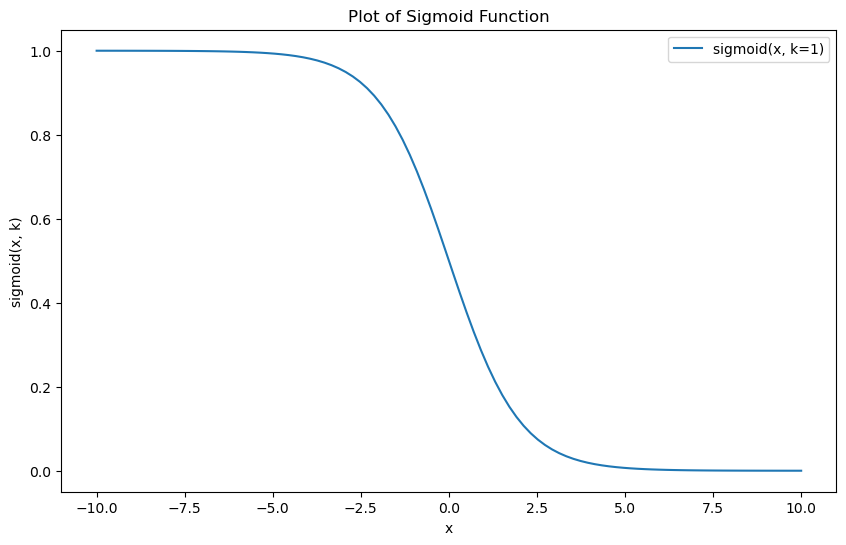

In [6]:
#plot this function between 0 and 10 1/(1 + np.exp( k * (x - d0) )) 
import numpy as np
import matplotlib.pyplot as plt 
def sigmoid(x, k=1., d0=0):
    denom = 1 + np.exp( k * (x - d0) )
    return 1./denom # Height 1 = d0 @ midpoint 0.5 contacts, Height 2 = d0 @ midpoint 1.0 contacts


# Define the range of x values
x_values = np.linspace(-10, 10, 100)

# Define the parameter k
k = 1

# Calculate the y values using the sigmoid function
y_values = sigmoid(x_values, k)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'sigmoid(x, k={k})')

# Add labels and title
plt.xlabel('x')
plt.ylabel('sigmoid(x, k)')
plt.title('Plot of Sigmoid Function')
plt.legend()

# Show the plot
plt.show()

